# **Ejemplo del Mecanismo de Atención de los Modelos Transformer**



***Ref:***

- https://sensioai.com/blog/041_attention
- Transformer: la tecnología que domina el mundo. https://www.themachinelearners.com/transformer/
- El mecanismo de atención del transformer. https://topbigdata.es/el-mecanismo-de-atencion-del-transformador/
- Attention Mechanism. https://www.linkedin.com/pulse/attention-mechanism-jos%C3%A9-manuel-cuesta-ram%C3%ADrez/?originalSubdomain=es


# **OBJETIVO GENERAL:**

-  Explicar en sencillo el Mecanismo de Atención que es la base de los Modelos Transformer,

***- ACTIVIDADES DE APRENDIZAJE:***

1.	Introducción
2. Hard Attention
3. Soft Attention
4. Selft Attention
5. Resumen






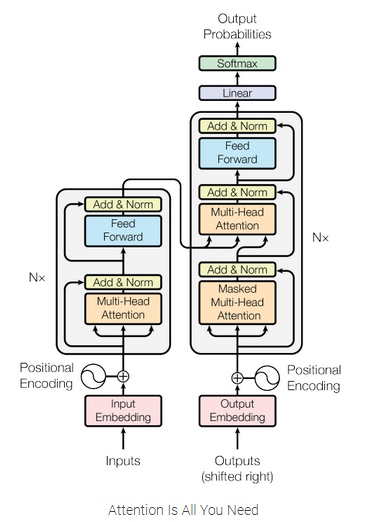

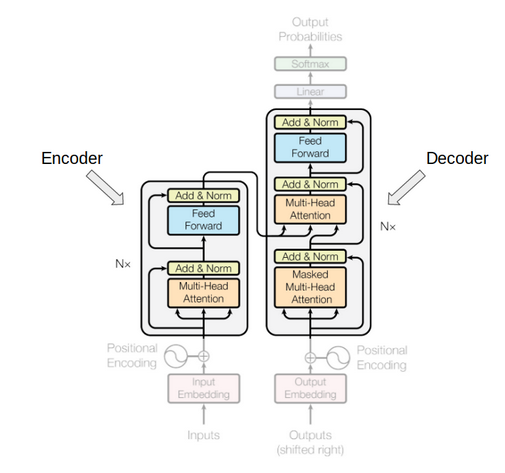

# 1. INTRODUCCIÓN

# Transformers - Atención

- Si hay un tema candente en el mundo del *Deep Learning* a día de hoy, ese es sin duda el de los *Transformers*.
- Desde que esta arquitectura de redes neuronales fue introducida en 2017 en el artículo [*Attention is all you need*](https://arxiv.org/abs/1706.03762) nuevas aplicaciones aparecen cada día en diferentes campos, mejorando el *state of the art*.
- Si bien el mayor impacto de los *Transformers* se ha visto en el campo del procesado de lenguaje natural, su aplicación en otros dominios (como el de la visión artificial) no hace más que crecer.
- Es debido a esta situación que se puede preguntar:
>>- ¿Qué es un *Transformer*?, ¿cómo funiona?, ¿en qué se diferencia de otras arquitecturas como redes convolucionales o recurrentes?

- Con el objetivo de dar respuesta a estas preguntas, y muchas otras que surgirán por el camino, este Caso de Uso inicia la senda de comprensión de los Transformer.  

## *Attention is all you need*

- Como se comentaba en el párrafo anterior, la arquitectura *Transformer* hizo su aparición a escena en 2017 gracias al artículo [*Attention is all you need*](https://arxiv.org/abs/1706.03762).

- El *paper* empieza así...

> *The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely.*

lo que traducido sería algo así como...

> *Los modelos secuenciales de transducción dominantes están basados en redes neuronales recurrentes o convolucionales complejas, las cuales incluyen un codificador y un decodificador. Los mejores modelos, además, conectan el codificador y el decodificador mediante un mecanismo de atención. Proponemos una nueva arquitectura simple, el Transformer, basado solamente en mecanismos de atención, haciendo innecesario el uso de recurrencia o convoluciones*

- A grandes rasgos, se puede observar que efectivamente se trata de una nueva arquitectura basada en algo llamado `mecanismos de atención`, y que no utiliza ni convoluciones ni recurrencia.

- EN este Caso de Uso se describe  en detalle sobre lo que significa `atención` y como se implementa.

## ¿Qué es la atención?

- Un mecanismo de atención, en el contexto de las redes neuronales, consiste en una operación matemática que recibe como *inputs* un conjunto de vectores (que ya sabemos que pueden representar texto, imágenes o cualquier tipo de datos con el que trabajemos) y da como resultado otro conjunto de vectores.
- Este resultado dependerá, obviamente, del tipo de mecanismo de atención que utilizemos.

- A continuación, se verá algunos ejemplos.

# 2. Hard attention

- El mecanismo de atención más sencillo de entender es el conocido como *hard attention mechanism*.
- En este tipo de atención se genera un número de vectores a la salida igual a los de la entrada (de ahora en adelante asumiremos que este es siempre el caso a no ser que se indique lo contrario) en el que cada *output* atenderá únicamente a su correspondiente vector a la entrada.
- O dicho de otra forma, este mecanismo de atención no produce nada nuevo, produce a la salida lo mismo que recibe a la entrada.

- Considerar, a  modeo de ejemplo, el conjunto de vectores siguiente.

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = torch.tensor([[1, 0],[0, 1], [-0.5, -0.5]])
X

tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-0.5000, -0.5000]])

In [ ]:
def plot_vectors(X, y=None):
    ax = plt.axes()
    plt.grid()
    for x in X:
        ax.arrow(0, 0, x[0], x[1], head_width=0.1, head_length=0.1, color="black")
    if y is not None:
        for _y in y:
            if _y.sum() != 0:
                ax.arrow(0, 0, _y[0], _y[1], head_width=0.1, head_length=0.1, color='red')
    plt.xlim(-1,1.5)
    plt.ylim(-1,1.5)
    plt.show()



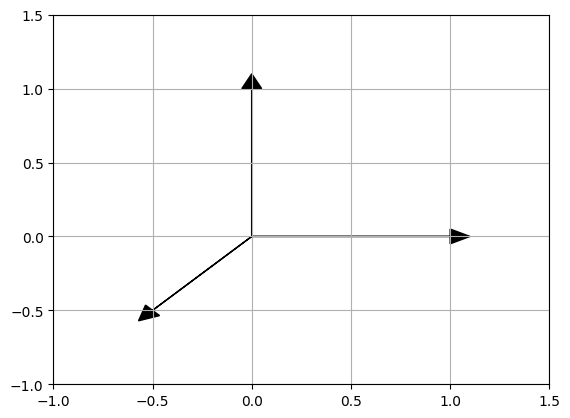

In [ ]:
plot_vectors(X)

- Un mecaniso de *hard attention* prestará atención 😉 a un único vector.
- Se puede representar como un vector en el que, en cada posición, se tiene el peso relativo de cada vector a la entrada.
- En este caso, todos los valores serán 0 excepto el que se encuentre en la mismo posición del vector al que se quiere prestar atención.

In [ ]:
# hard attention (a es one hot)
# atendemos al primer vector
a = torch.tensor([1, 0, 0])
a

tensor([1, 0, 0])

- Para aplicar el mecanismo de atención, simplemente se multiplica el conjunto de vectores por el vector de atención.

In [ ]:
# todos los vectores en la salida son 0, excepto al que hemos prestado atención

y = a.unsqueeze(1) * X
y

tensor([[1., 0.],
        [0., 0.],
        [-0., -0.]])

- Se puede observar en rojo la salida del mecanismo de atención fuerte cuandose atiende al primer vector (es, efectivamente, igual al primer vector).
- Se ha prestado atención únicamente a un elemento del conjunto, deshechando el resto.

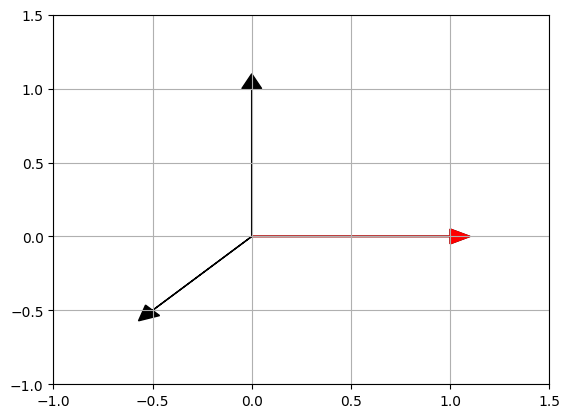

In [ ]:
plot_vectors(X, y)

- Se puede aplicar este mecanismo en una sola operación a todos los vectores generando una matriz de atención.
- En el caso de *hard attention*, esta matriz es la identidad.

In [ ]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

- Multiplicando nuestra matriz de atención por la matriz que contiene todos los vectores de entrada, obtenemos los vectores de salida.
- En este caso, si se repite, se obtendrá exactamente el mismo conjunto de vectores ya que cada vector a la salida atiene únicamente a un vector a la entrada, aquel que está en su misma posición.

In [ ]:
Y = A @ X
Y

tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-0.5000, -0.5000]])

In [ ]:
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], head_width=0.1, color="black", head_length=0.1)
      ax.arrow(0, 0, y[0], y[1], head_width=0.1, head_length=0.1, color='red')
      ax.set_xlim(-1,1.5)
      ax.set_ylim(-1,1.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

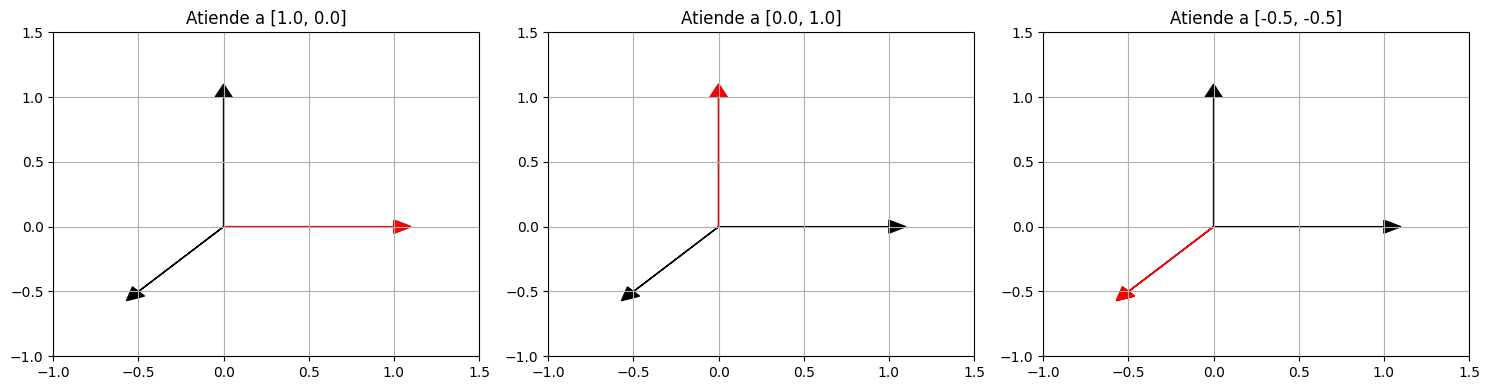

In [ ]:
plot(X, Y)

# 3. Soft attention

- Otro tipo de mecanismo un poco más flexible es "Soft Attention".
- Si en el caso de la atención fuerte, cada vector generado presta atención simplemente a un único vector en la entrada, en el caso de la atención débil vamos a permitir prestar atención a todos los vectores a la entrada.
- Así pues, cada vector generado será una combinación de los *inputs*.
- En el siguiente ejemplo, cada vector generado presta un 80% de atención al vector en la entrada en su misma posición y un 10% al resto.

In [ ]:
# soft attention (cada fila suma 1)

A = torch.ones((3, 3))*0.1
A.fill_diagonal_(0.8)
A

tensor([[0.8000, 0.1000, 0.1000],
        [0.1000, 0.8000, 0.1000],
        [0.1000, 0.1000, 0.8000]])

In [ ]:
Y = A @ X
Y

tensor([[ 0.7500,  0.0500],
        [ 0.0500,  0.7500],
        [-0.3000, -0.3000]])

In [ ]:
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], color="black", head_width=0.1, head_length=0.1)
      Z = A[i].unsqueeze(1) * X
      for z in Z:
        ax.arrow(0, 0, z[0], z[1], head_width=0.1, head_length=0.1, color='green')
      ax.arrow(0, 0, y[0], y[1], head_width=0.1, head_length=0.1, color='red')
      ax.set_xlim(-1,1.5)
      ax.set_ylim(-1,1.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

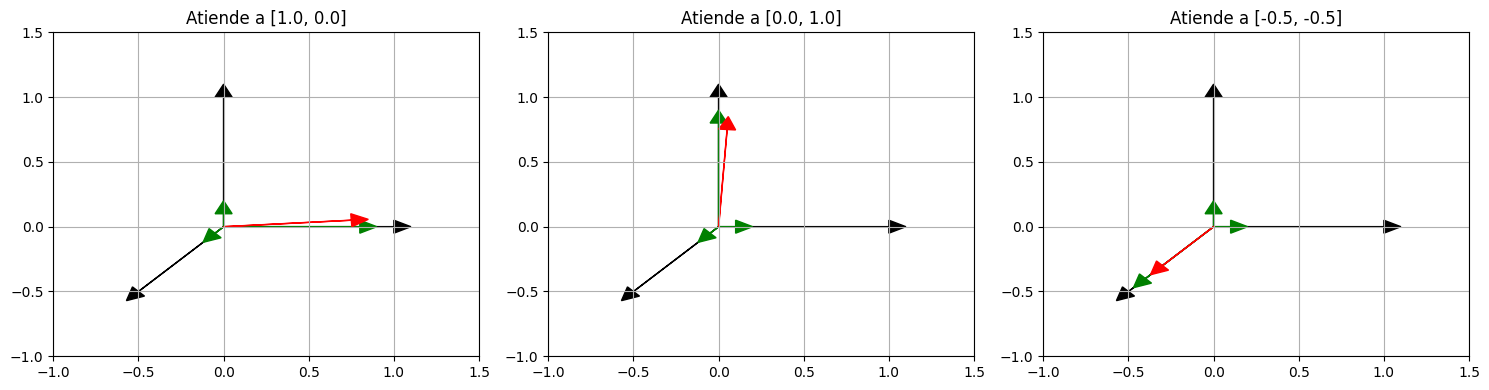

In [ ]:
plot(X, Y)

- En verde se puede ver la contribución de cada vector al resultado, mientras que en rojo puedes ver los vectores generados por nuestro mecanismo de atención.
- En este caso, son muy similares a los originales ya que estamos prestando mucha atención a éstos mismo. Sin embargo, el resto de vectores pueden influir en el resultado.
- Ahora, se va a prestar igual atención a todos los vectores.

In [ ]:
A = torch.ones((3, 3))*(1./3.)
A

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])

In [ ]:
Y = A @ X
Y

tensor([[0.1667, 0.1667],
        [0.1667, 0.1667],
        [0.1667, 0.1667]])

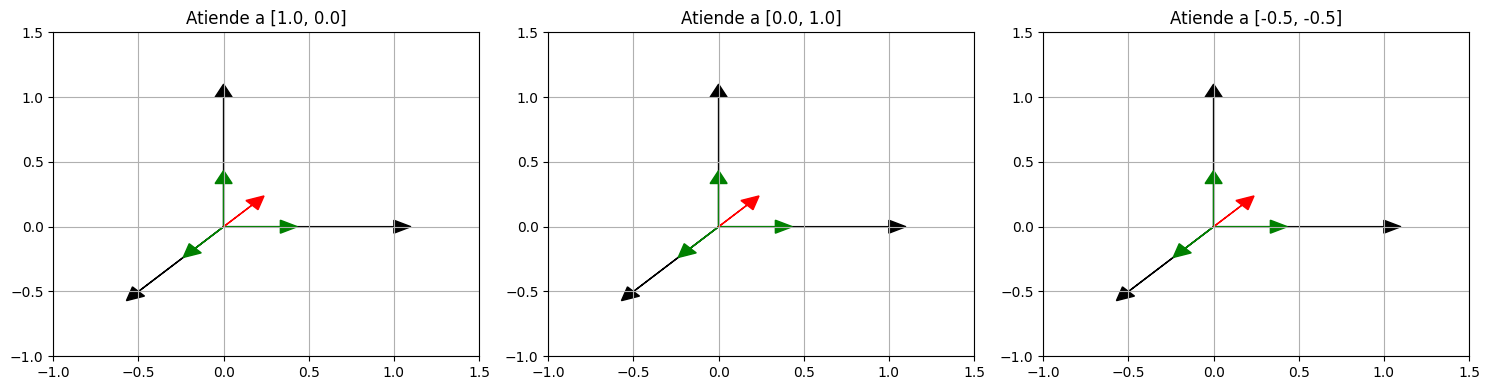

In [ ]:
plot(X, Y)

En este caso, todos los vectores generados son iguales. La pregunta ahora es, ¿cuánta atención debe un vector prestar al resto? La respuesta es sencilla...*Self attention* !

#4. Self attention

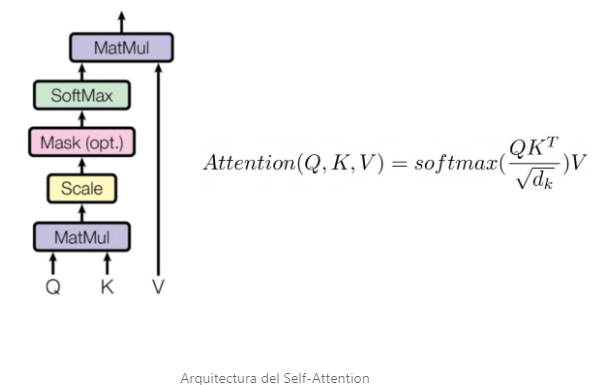

- En este último mecanismo de atención, cada vector es responsable de decidir por si mismo cuánta atención prestar al resto. Para ello se calcula la similitud entre vectores.
- Cuanto más parecidos sean dos vectores, más atención habrá entre ellos y viceversa.
- En una tarea de traducción de texto, por ejemplo, a la hora de generar una palabra un mecanismo de *self attention* permitiría prestar más atención a aquellas palabras más relacionadas a la entrada, y no desperdiciar computación con aquellas que no tienen importancia.
- Esta similitud se calcula multiplicando los vectores por si mismos y aplicando una función softmax.

In [ ]:
# self attention -> similitud de cada vector con el resto

A = torch.softmax(X @ X.T, 1)
A

tensor([[0.6285, 0.2312, 0.1402],
        [0.2312, 0.6285, 0.1402],
        [0.2119, 0.2119, 0.5761]])

In [ ]:
Y = A @ X
Y

tensor([[ 0.5584,  0.1611],
        [ 0.1611,  0.5584],
        [-0.0761, -0.0761]])

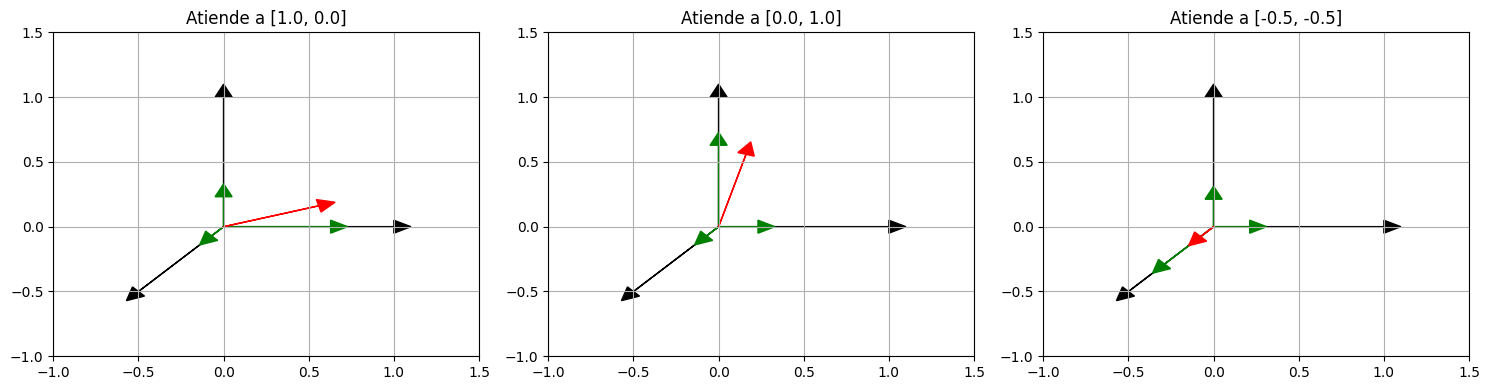

In [ ]:
plot(X, Y)

#5. Resumen

1. En este Caso de Uso se ha mostrado uno de los principales conceptos a la hora de trabajar con *Transformers*: los mecanismos de atención.
2. Se ha mostrado que estos mecanismos reciben conjuntos de vectores a su entrada y son responsables de generar otro a su salida. Este resultado dependerá del mecanismo.
3. En *hard attention*, cada vector generado presta atención únicamente a un vector (aquel que se encuentra en su misma posición a la entrada).
4. En *soft attention* se generan vectores que son combinaciones de todos los vectores a la entrada.
5. Por último, un mecanismo de *self attention* no es más que un mecanismo de *soft attention* en el que la importancia de cada vector a la entrada depende de la similitud entre este y el resto de *inputs*.
